## CNN 실습

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.layers import Dropout

In [2]:
import matplotlib.pyplot as plt

# 모델 학습
def history_plot(history):
  # 훈련 손실 및 검증 손실 그래프
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Train and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  # 훈련 정확도 및 검증 정확도 그래프
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Train and Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()


In [1]:



# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# 이미지 전처리 함수 정의
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image /= 255.0
    return image, label

# 데이터셋 전처리 및 배치 설정
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteJTTEGK/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Epoch 1/5
582/582 [==============================] - 46s 66ms/step - loss: 0.5761 - accuracy: 0.6918 - val_loss: 0.4907 - val_accuracy: 0.7749
Epoch 2/5
582/582 [==============================] - 36s 61ms/step - loss: 0.4440 - accuracy: 0.7951 - val_loss: 0.4788 - val_accuracy: 0.7898
Epoch 3/5
582/582 [==============================] - 42s 70ms/step - loss: 0.3731 - accuracy: 0.8343 - val_loss: 0.4032 - val_accuracy: 0.8212
Epoch 4/5
582/582 [==============================] - 43s 73ms/step - loss: 0.2971 - accuracy: 0.8738 - val_loss: 0.5496 - val_accuracy: 0.7691
Epoch 5/5
582/582 [==============================] - 37s 62ms/step - loss: 0.2039 - accuracy: 0.9159 - val_loss: 0.5100 - val_accuracy: 0.8134


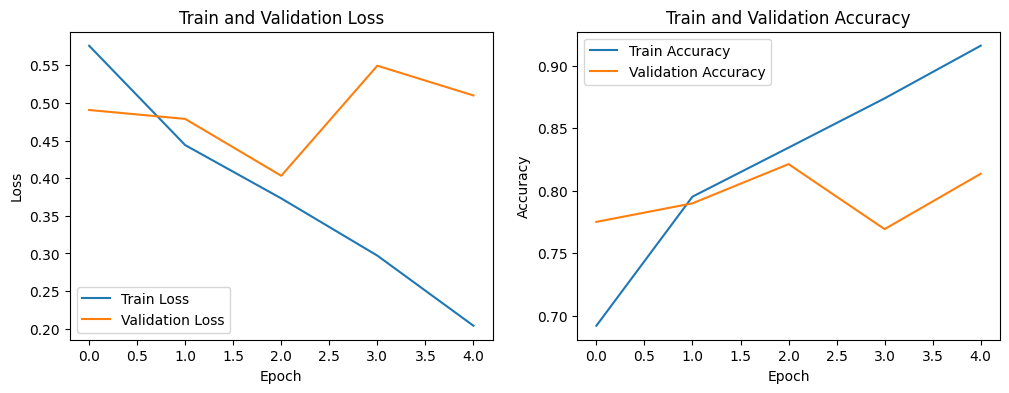

In [3]:
history_plot(history)

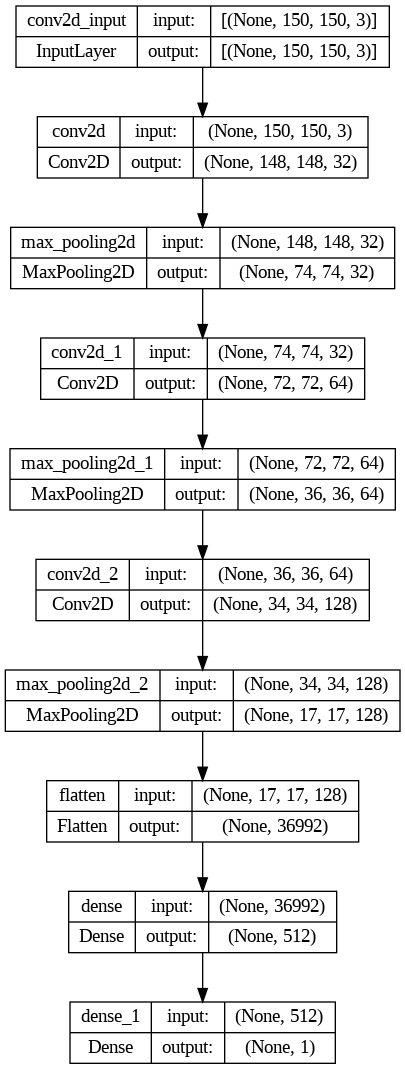

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# import numpy as np

# # 모델 학습
# history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# # 테스트 데이터에서 5개의 이미지 및 모델이 분류한 결과 출력
# sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))

# # 모델 평가
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

# # 모델 예측
# predictions = model.predict(sample_test_images)

# # 이미지 및 예측 결과 출력
# class_names = ['Cat', 'Dog']
# for i in range(5):
#     predicted_label = np.argmax(predictions[i])
#     true_label = int(sample_test_labels[i])
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(sample_test_images[i])
#     plt.title(f'True Label: {class_names[true_label]}')
#     plt.subplot(1, 2, 2)
#     plt.bar(class_names, predictions[i])
#     plt.title(f'Model Prediction: {class_names[predicted_label]}')
#     plt.show()


from tensorflow.keras.layers import Dropout

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # 첫 번째 드롭아웃 레이어 추가
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),  # 두 번째 드롭아웃 레이어 추가
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),  # 세 번째 드롭아웃 레이어 추가
#     Dense(1, activation='sigmoid')
# ])



In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 데이터셋 로드
(train_dataset, test_dataset), info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# 이미지 전처리 함수 정의
def preprocess_image(image, label):
    image = tf.image.resize(image, (150, 150))
    image /= 255.0
    return image, label

# 데이터셋 전처리 및 배치 설정
BATCH_SIZE = 32
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(BATCH_SIZE)
test_dataset = test_dataset.map(preprocess_image).batch(BATCH_SIZE)

# 데이터 증강 함수 정의
def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
    return image, label

# 증강된 데이터셋 생성
augmented_train_dataset = train_dataset.map(augment_image)

# CNN 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류이므로 sigmoid 사용
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(augmented_train_dataset, epochs=30, validation_data=test_dataset)


Epoch 1/30
582/582 [==============================] - 45s 72ms/step - loss: 0.6754 - accuracy: 0.5783 - val_loss: 0.6448 - val_accuracy: 0.6511
Epoch 2/30
582/582 [==============================] - 42s 70ms/step - loss: 0.6105 - accuracy: 0.6617 - val_loss: 0.5518 - val_accuracy: 0.7246
Epoch 3/30
582/582 [==============================] - 47s 78ms/step - loss: 0.5839 - accuracy: 0.6828 - val_loss: 0.5569 - val_accuracy: 0.7031
Epoch 4/30
582/582 [==============================] - 57s 95ms/step - loss: 0.5529 - accuracy: 0.7105 - val_loss: 0.5120 - val_accuracy: 0.7416
Epoch 5/30
582/582 [==============================] - 48s 80ms/step - loss: 0.5394 - accuracy: 0.7202 - val_loss: 0.5112 - val_accuracy: 0.7446
Epoch 6/30
582/582 [==============================] - 55s 91ms/step - loss: 0.5157 - accuracy: 0.7418 - val_loss: 0.4749 - val_accuracy: 0.7678
Epoch 7/30
582/582 [==============================] - 54s 91ms/step - loss: 0.4865 - accuracy: 0.7653 - val_loss: 0.4951 - val_accuracy:

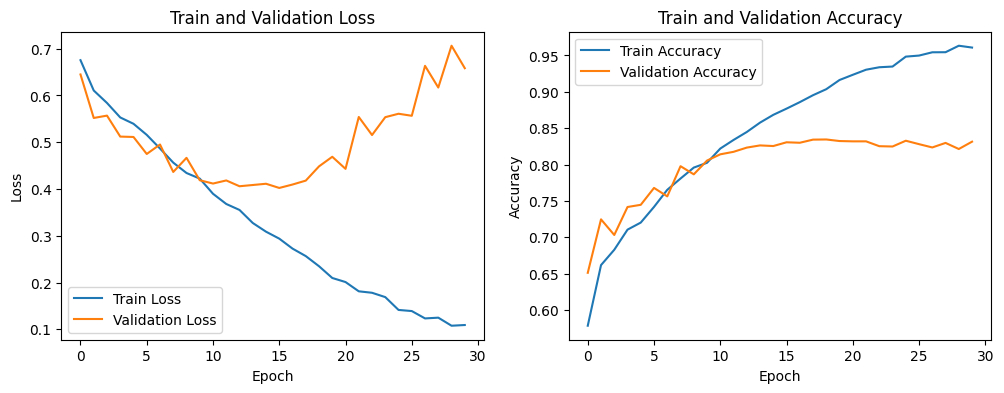

146/146 [==============================] - 8s 53ms/step - loss: 0.6582 - accuracy: 0.8315
Test Loss: 0.6582
Test Accuracy: 0.8315
1/1 [==============================] - 0s 24ms/step


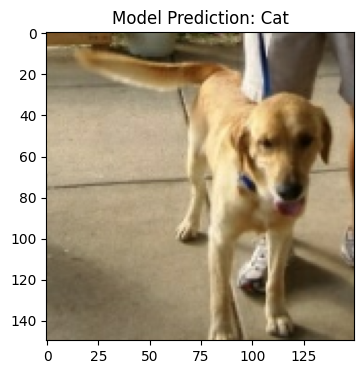

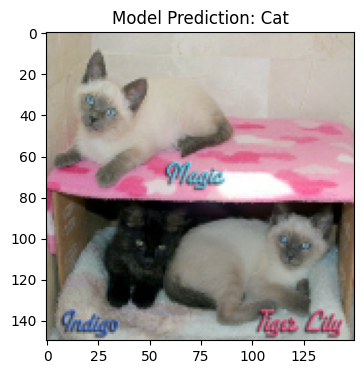

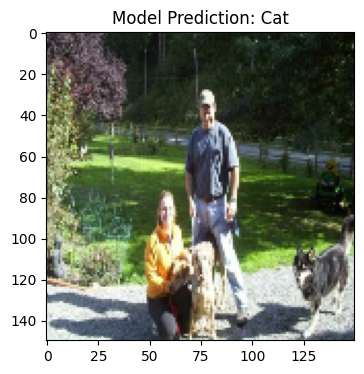

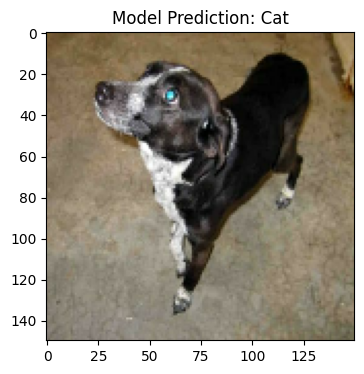

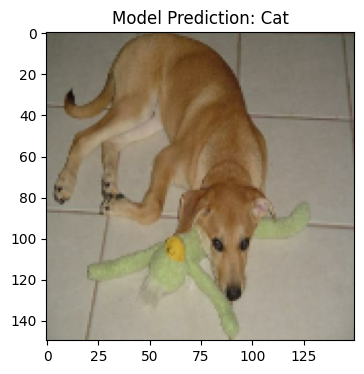

In [8]:
import numpy as np


def model_predict_example(model, test_dataset,class_names):
  sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))
  test_loss, test_accuracy = model.evaluate(test_dataset)
  print(f'Test Loss: {test_loss:.4f}')
  print(f'Test Accuracy: {test_accuracy:.4f}')
  predictions = model.predict(sample_test_images)
  for i in range(5):
    predicted_label = np.argmax(predictions[i])
    true_label = int(sample_test_labels[i])
    plt.figure(figsize=(8, 4))
    plt.imshow(sample_test_images[i])
    plt.title(f'Model Prediction: {class_names[predicted_label]}')
    # (f)
    plt.show()

history_plot(history)
model_predict_example(model, test_dataset,class_names =['Cat', 'Dog'])








# import numpy as np

# # 모델 학습
# history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# # 테스트 데이터에서 5개의 이미지 및 모델이 분류한 결과 출력
# sample_test_images, sample_test_labels = next(iter(test_dataset.take(5)))

# # 모델 평가
# test_loss, test_accuracy = model.evaluate(test_dataset)
# print(f'Test Loss: {test_loss:.4f}')
# print(f'Test Accuracy: {test_accuracy:.4f}')

# # 모델 예측
# predictions = model.predict(sample_test_images)

# # 이미지 및 예측 결과 출력
# class_names = ['Cat', 'Dog']
# for i in range(5):
#     predicted_label = np.argmax(predictions[i])
#     true_label = int(sample_test_labels[i])
#     plt.figure(figsize=(8, 4))
#     plt.subplot(1, 2, 1)
#     plt.imshow(sample_test_images[i])
#     plt.title(f'True Label: {class_names[true_label]}')
#     plt.subplot(1, 2, 2)
#     plt.bar(class_names, predictions[i])
#     plt.title(f'Model Prediction: {class_names[predicted_label]}')
#     plt.show()
